In [1]:
# Import library yang dibutuhkan
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import json

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="1" # Kalau GPU nya cuma 1 ini gak perlu di panggil

In [3]:
# List dataset
test_dataset_path = "../datasets/coffee/test"

list_test_dataset = [nama_file for nama_file in os.listdir(test_dataset_path) if nama_file.endswith(".jpg")]
print(list_test_dataset)

['154.jpg', '10.jpg', '179.jpg', '146.jpg', '152.jpg', '27.jpg', '139.jpg', '73.jpg', '33.jpg', '15.jpg', '183.jpg', '88.jpg', '119.jpg', '135.jpg', '150.jpg', '0.jpg', '61.jpg', '38.jpg', '77.jpg', '20.jpg', '69.jpg', '93.jpg', '130.jpg', '28.jpg', '153.jpg', '105.jpg', '164.jpg', '169.jpg', '65.jpg', '166.jpg', '122.jpg', '87.jpg', '148.jpg', '95.jpg', '142.jpg', '177.jpg', '98.jpg', '117.jpg', '83.jpg', '188.jpg', '100.jpg', '31.jpg', '62.jpg', '26.jpg', '8.jpg', '50.jpg', '103.jpg', '68.jpg', '145.jpg', '80.jpg', '102.jpg', '181.jpg', '182.jpg', '198.jpg', '126.jpg', '172.jpg', '86.jpg', '45.jpg', '24.jpg', '94.jpg', '101.jpg', '44.jpg', '160.jpg', '189.jpg', '66.jpg', '140.jpg', '21.jpg', '2.jpg', '157.jpg', '191.jpg', '58.jpg', '138.jpg', '186.jpg', '30.jpg', '75.jpg', '29.jpg', '171.jpg', '136.jpg', '47.jpg', '22.jpg', '190.jpg', '141.jpg', '54.jpg', '85.jpg', '76.jpg', '165.jpg', '114.jpg', '129.jpg', '109.jpg', '43.jpg', '128.jpg', '17.jpg', '46.jpg', '104.jpg', '11.jpg', '72.

In [4]:
# Urutkan file
list_test_dataset = sorted(list_test_dataset, key=lambda nama_file: int(nama_file.split('.')[0]))
print(list_test_dataset)

['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '80.jpg', '81.jpg', '82.jpg', '83.jpg', '84.jpg', '85.jpg', '86.jpg', '87.jpg', '88.jpg', '89.jpg', '90.jpg', '91.jpg', '92.jpg', '93.jpg', '94.jpg', '95.jpg', '96.jpg', '97.jpg', '98.jpg', '99.jpg', '100.jpg'

In [5]:
print(f'Total file: {len(list_test_dataset)}')

Total file: 200


In [6]:
list_katagori = ['defect', 'longberry', 'peaberry', 'premium']

In [7]:
# Muat model yg terbaik
lokasi_model = "../models/Coffee_DenseNet169_raw-fold_0-best_test.keras"

tf.keras.backend.clear_session()
model = tf.keras.models.load_model(lokasi_model)
model.summary()

Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [8]:
list_test_gambar = []
list_hasil_prediksi = []

# Prediksi setiap test file
for i, nama_test_dataset in enumerate(list_test_dataset):
    # Dapatkan lokasi test dataset
    lokasi_test_dataset = os.path.join(test_dataset_path, nama_test_dataset)
    
    # Muat gambar di lokasi test dataset tersebut
    gambar_test = np.array(tf.keras.utils.load_img(lokasi_test_dataset, target_size=(224, 224)))
    
    # Normalisasi gambar menjadi range 0.0 ~ 1.0
    gambar_test = gambar_test.astype(np.float32) / 255.0
    if i == 0:
        print(f"Bentuk gambar: {gambar_test.shape}")
    
    # Tambahkan dimensi batch di awal (karena format TensorFlow ada batch di depan)
    gambar_test = np.expand_dims(gambar_test, axis=0) # Dimensi = (1, 224, 224, 3)
    if i == 0:
        print(f"Bentuk gambar setelah batch: {gambar_test.shape}")
    
    # Prediksi kategori dengan model yang sudah di training
    hasil_prediksi = model.predict(gambar_test) # Dimensi output: [1, 4] [Batch, Jumlah Kategori] 
    hasil_prediksi = hasil_prediksi[0] # Dimensi: [4] (Skor untuk masing2 kategori)
    if i == 0:
        print(f"Skor prediksi: {hasil_prediksi}")
    
    # Ambil index untuk skor yang paling besar
    prediksi_index = np.argmax(hasil_prediksi)
    if i == 0:
        print(f"Index dengan skor tertingi: {prediksi_index}")
    
    # Ubah index menjadi nama kategori
    prediksi_nama = list_katagori[prediksi_index]
    if i == 0:
        print(f"Hasil prediksi: {prediksi_nama} dengan skor {hasil_prediksi[prediksi_index] * 100:.2f}%")
    
    # Tambahkan gambar pada list untuk visualisasi (optional)
    list_test_gambar.append(gambar_test[0])
    
    # Tambahkan hasil prediksi pada list untuk file submisi
    list_hasil_prediksi.append(prediksi_nama)

Bentuk gambar: (224, 224, 3)
Bentuk gambar setelah batch: (1, 224, 224, 3)
1/1 [==============================] - 5s 5s/step
Skor prediksi: [9.7299552e-01 5.7511260e-03 2.8554592e-04 2.0967735e-02]
Index dengan skor tertingi: 0
Hasil prediksi: defect dengan skor 97.30%
1/1 [==============================] - 0s 62ms/step


In [9]:
print(f"Jumlah gambar: {len(list_test_gambar)} | Jumlah hasil prediksi {len(list_hasil_prediksi)}")

Jumlah gambar: 200 | Jumlah hasil prediksi 200


In [10]:
def plot_images(images, nama_file=None, labels=None, rows=1, cols=10, figsize=(25, 5)):
    if len(images) != rows * cols:
        raise ValueError("Number of images must be equal to rows * cols.")

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.1, hspace=0.1)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        label = ""
        if nama_file is not None:
            label = label + nama_file[i] + " -> "
        if labels is not None:
            label = label + labels[i]
        ax.set_title(label)
        ax.axis('off')

    plt.show()

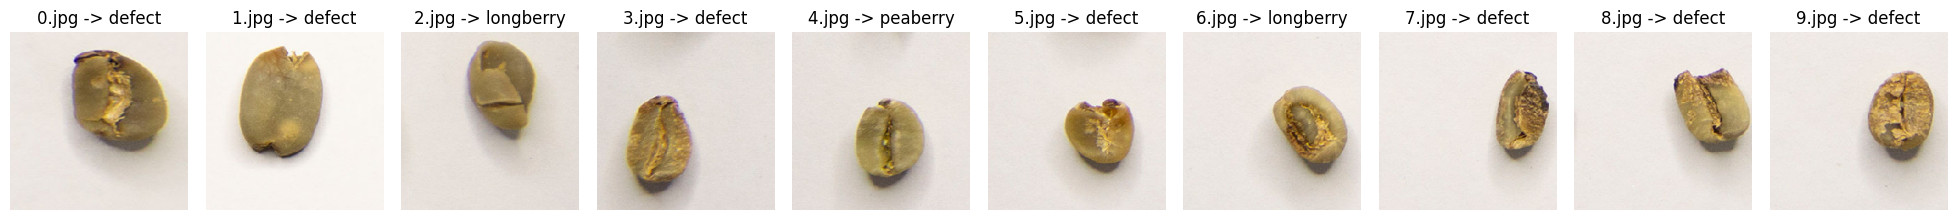

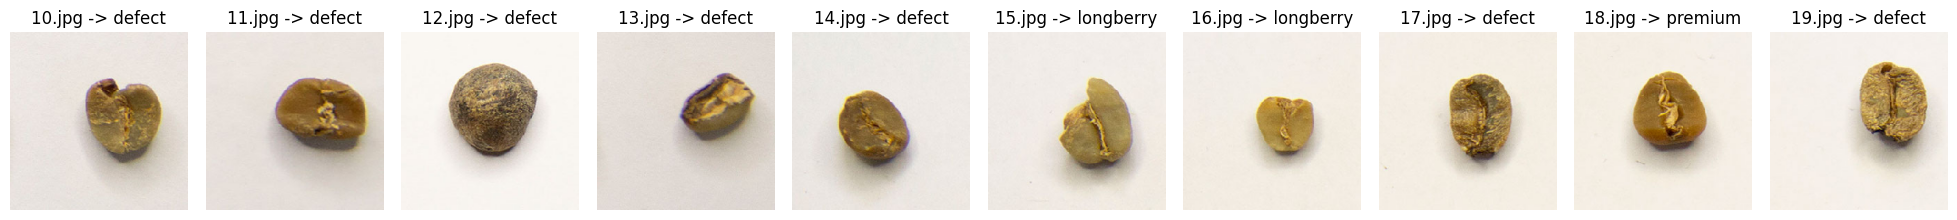

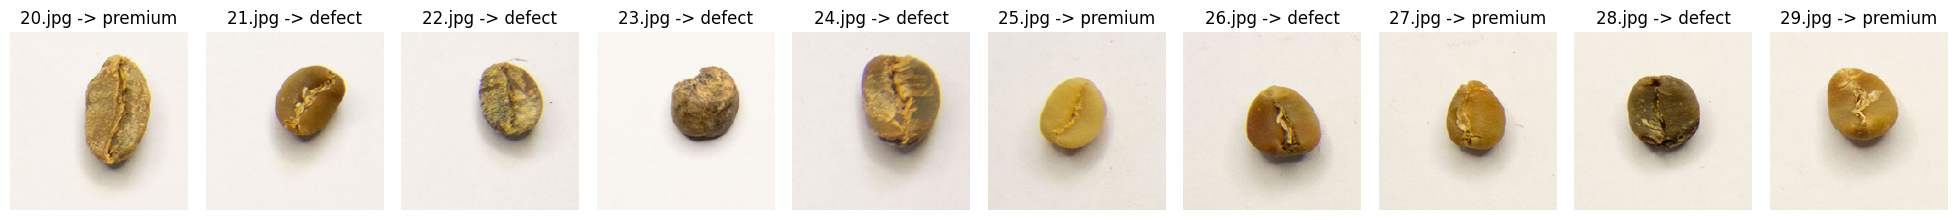

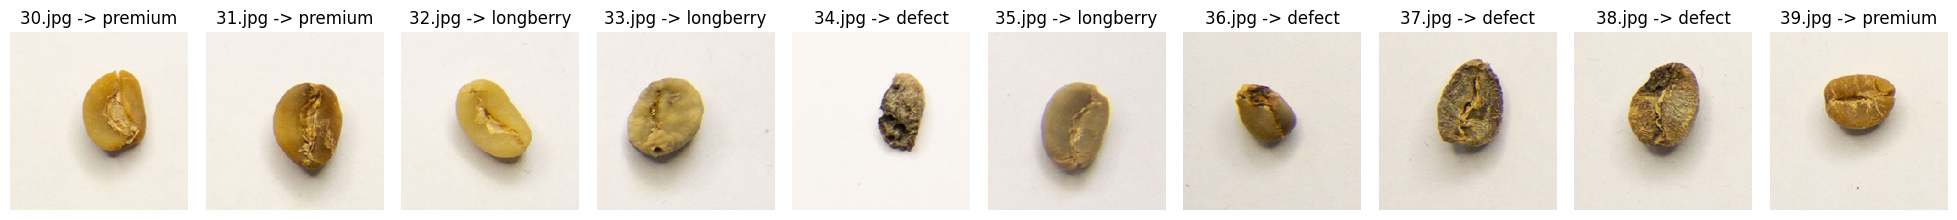

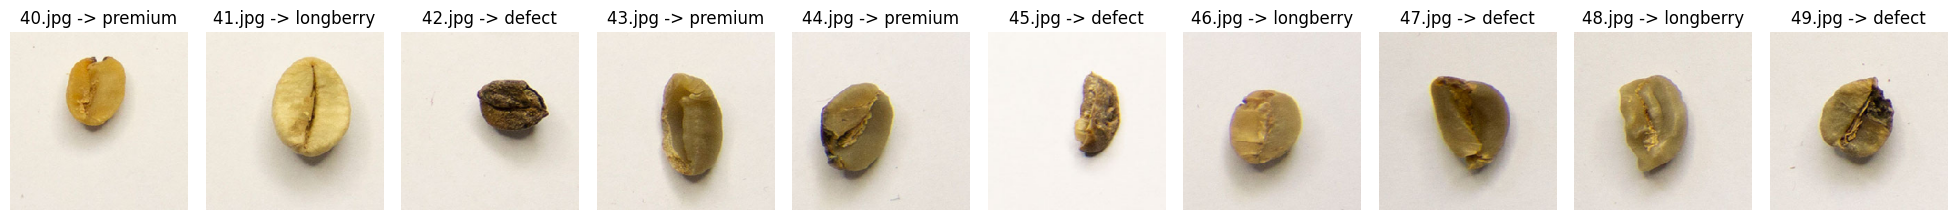

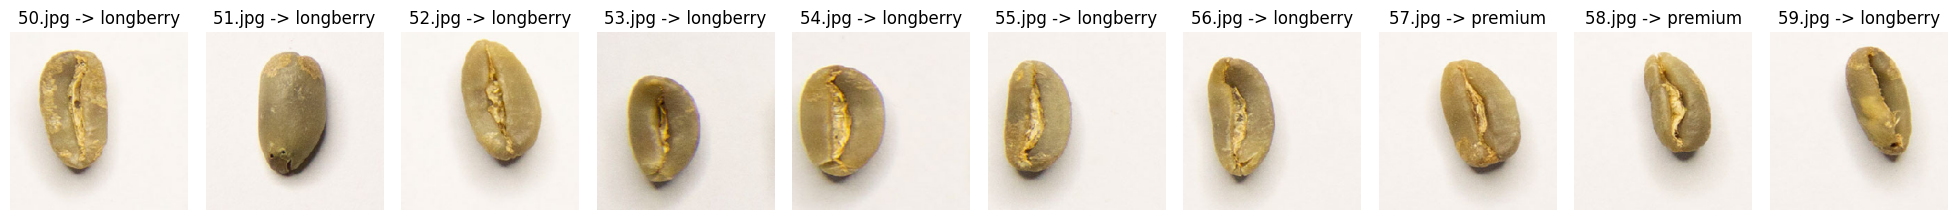

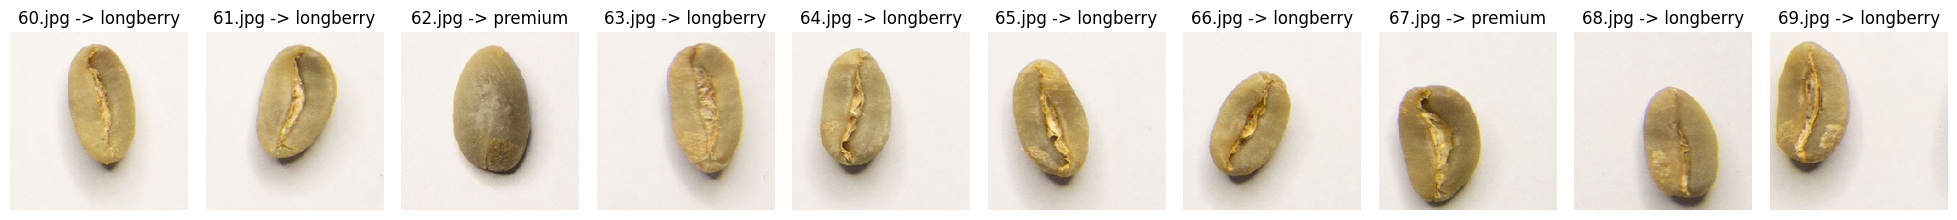

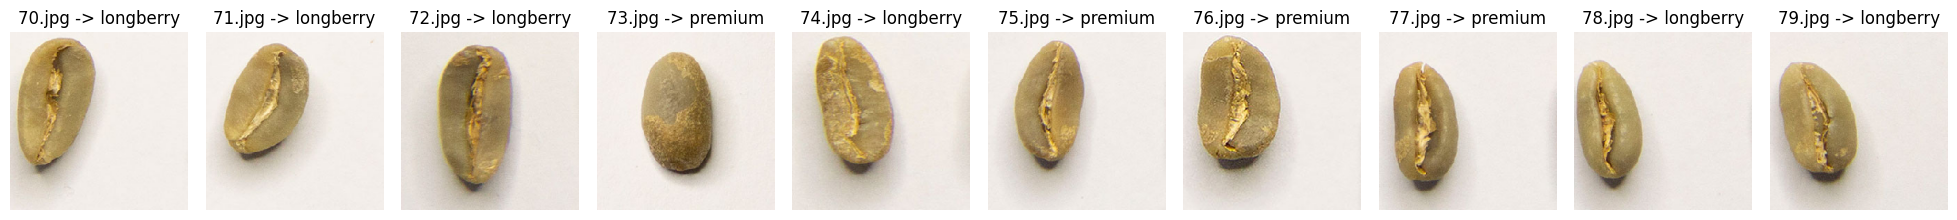

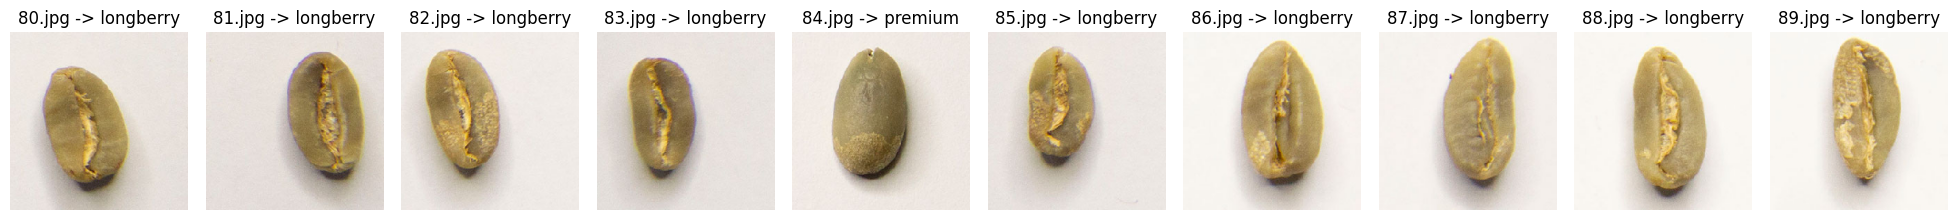

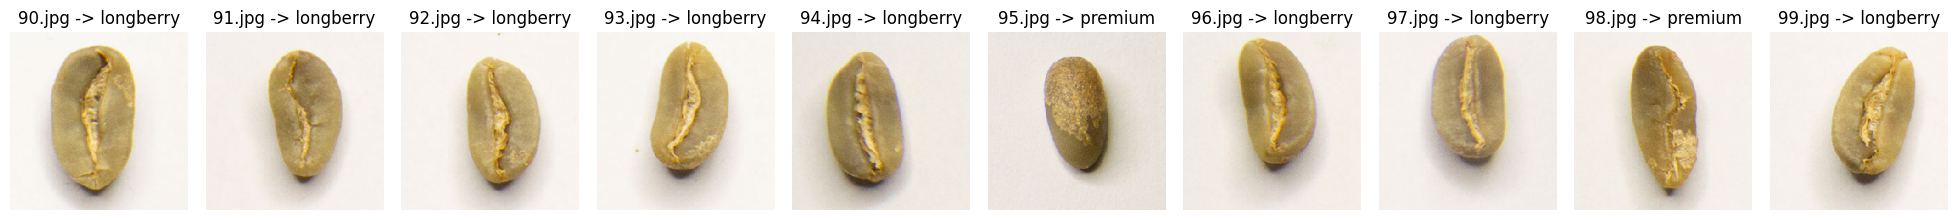

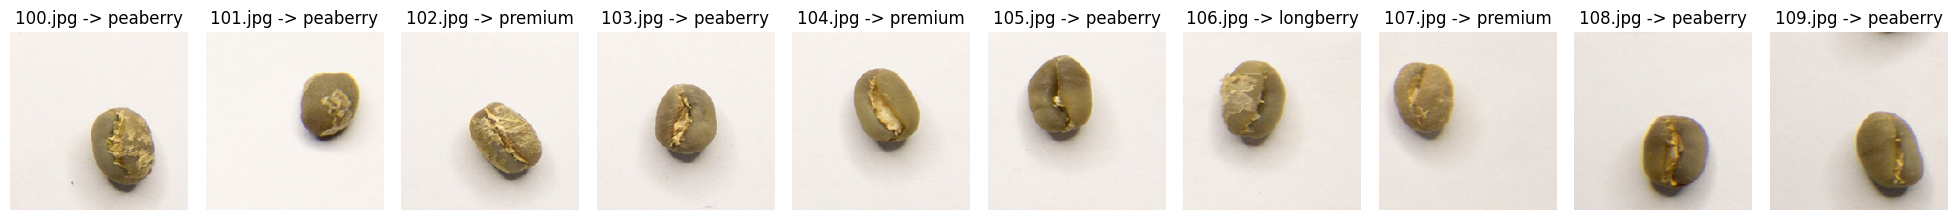

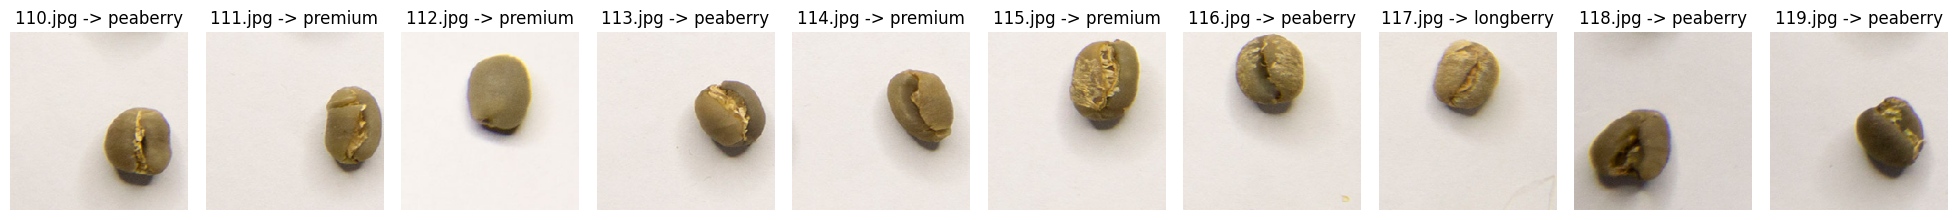

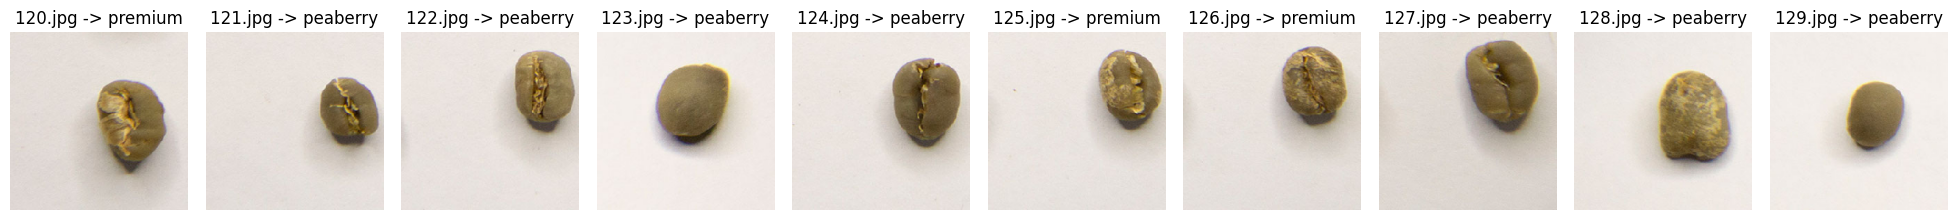

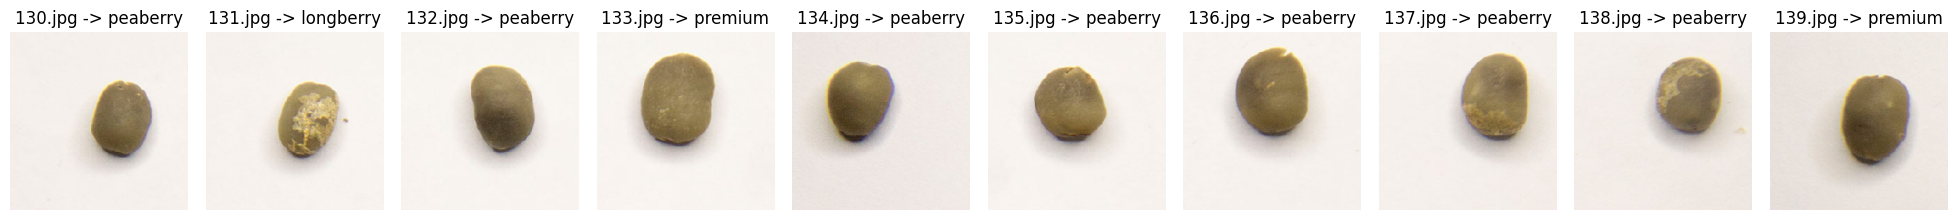

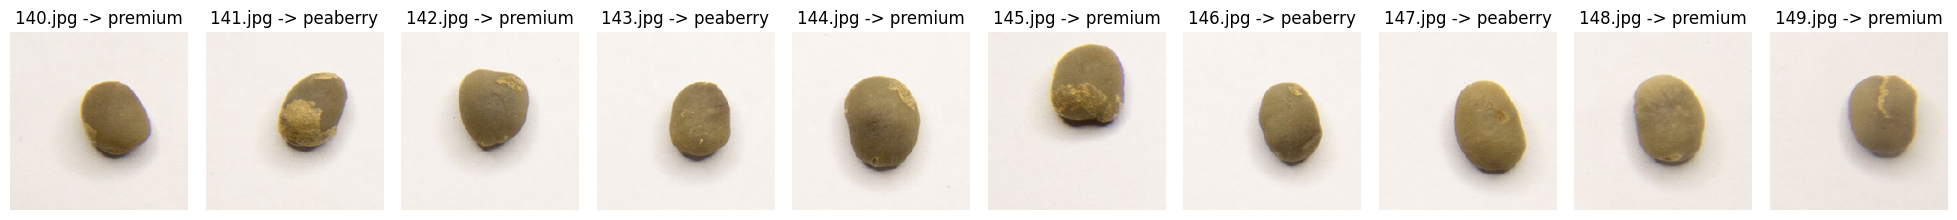

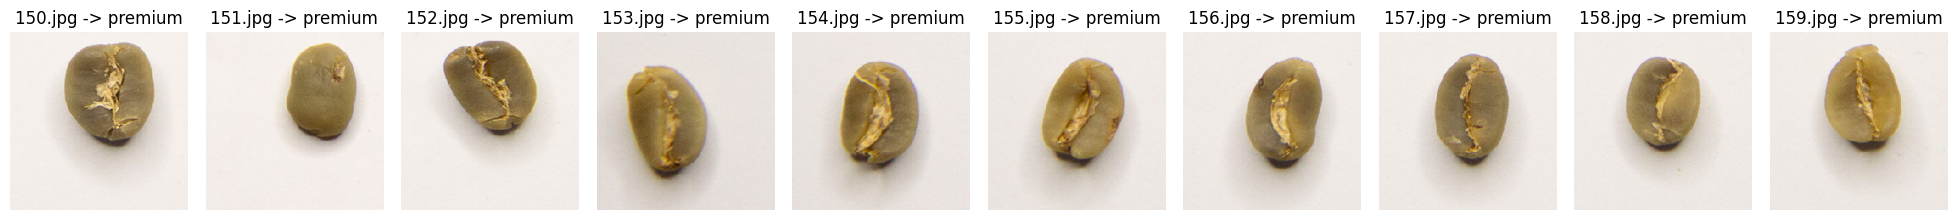

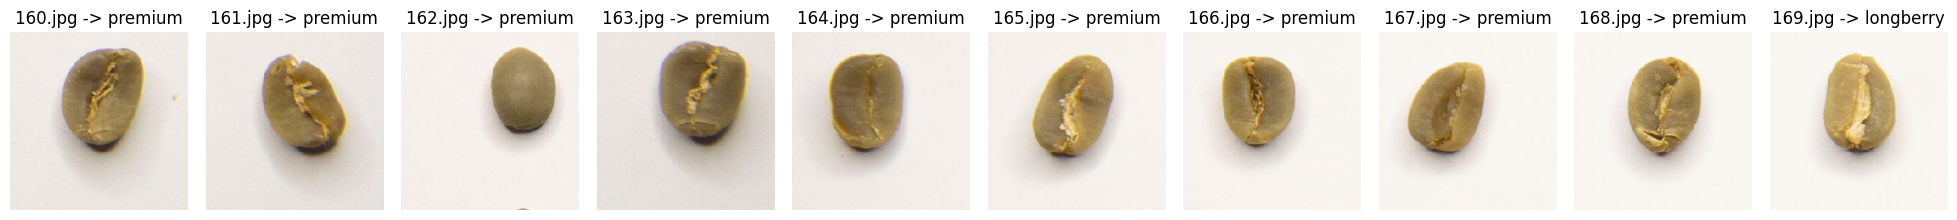

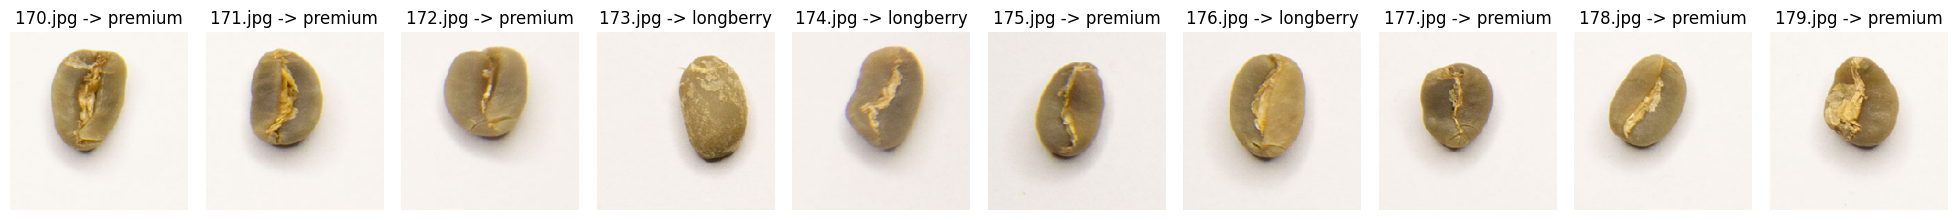

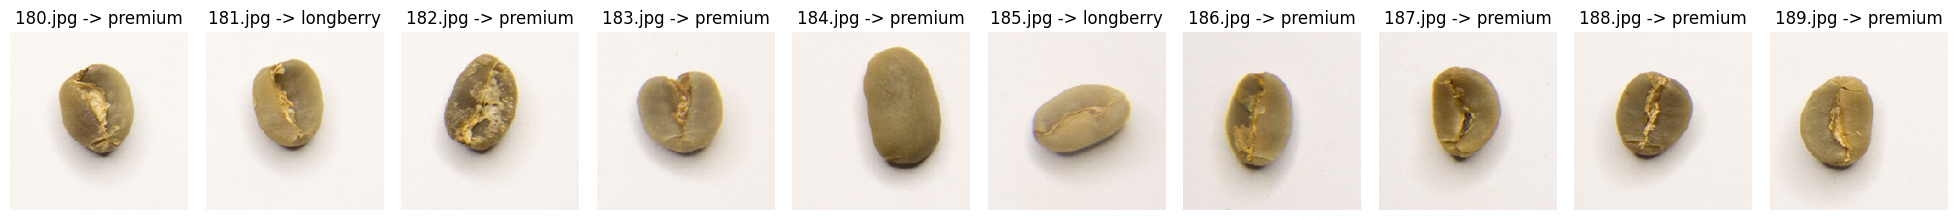

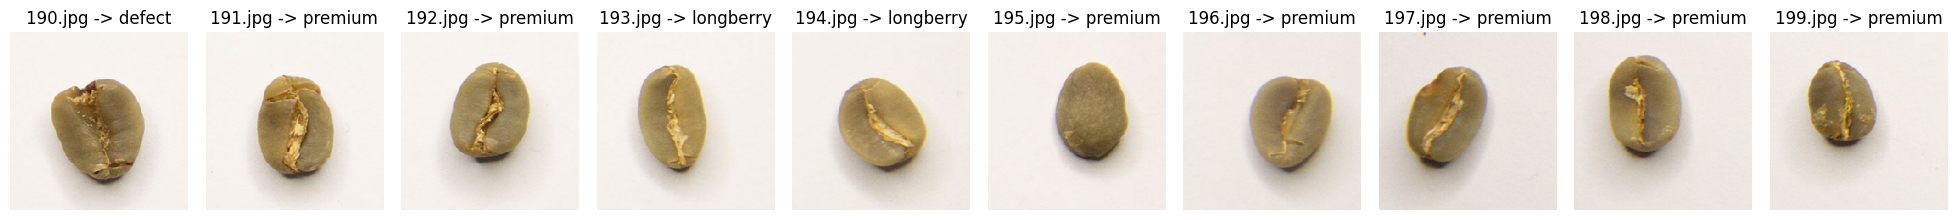

In [11]:
# Tampilkan semua gambar dan hasil prediksi
for i in range(20):
    plot_images(list_test_gambar[i*10:i*10+10], list_test_dataset[i*10:i*10+10], list_hasil_prediksi[i*10:i*10+10])

In [12]:
# Simpan hasil prediksi ke format csv
file_submission = pd.DataFrame(
    {'.id': list_test_dataset,
     'predict': list_hasil_prediksi,
    })

file_submission.head()

.id    predict
0  0.jpg     defect
1  1.jpg     defect
2  2.jpg  longberry
3  3.jpg     defect
4  4.jpg   peaberry

In [13]:
file_submission.to_csv("file_submission.csv", index=False)